In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('medical-charges.csv')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## from df.info() we can see 1338 non-null count of all columns , which means there is no null values in the dataset.So far the dataset look very clean

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [16]:
#let's take a look at the dataset
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory Analysis & Visualization

In [18]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [19]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [20]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [21]:
fig1 = px.histogram(df,
x = 'age',
marginal='box',
nbins=47,
title='Distribution of age')
fig1.update_layout(bargap = 0.1)
fig1.show()

the age distribution is almost uniform , except for age 18,19. 

## One insight : 
### for age 18 & 19 having more count could be because ACME could have given some discount with enrolling young.

In [22]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [23]:
fig2 = px.histogram(df,
x = 'bmi',
marginal='box',
nbins=47,
color_discrete_sequence= ['red','purple'],
title='distribution of BMI')
fig2.update_layout(bargap = 0.1)
fig2.show()

the distribution is not uniform(ofc). This is a good example of 'Normal Distribution' of data . BMI is concentrated around 26-34 .

# CHARGES 

In [24]:
df 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
fig3 = px.histogram(df, 
x = 'charges',
marginal='box', 
color='smoker'
)
fig3.update_layout(bargap = 0.1)
fig3.show()

# SMOKERS

In [26]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [27]:
fig4 = px.histogram(df,
x = 'smoker',
color = 'sex')
fig4.show()

Let's Visualize the relation between 'age' and 'charges' 

In [28]:
fig5 = px.scatter(df, x='age',y = 'charges', color='smoker',opacity=0.5)
# here i have added opacity, why ? there a too many records and they may overlap , inorder to see them explicitly , i have reduced theopacity
fig5.show()

In [29]:
fig6 = px.histogram(df,x = 'region',color='sex')
fig6.show()

# BMI vs Charges

In [30]:
fig7 = px.scatter(df,x = 'bmi',y='charges',color='smoker')
fig7.show()

For non-smokers - Its clear that BMI and charges have no definite relation 
For smokers -you can see a trend here , there are two clusters 

# Correlation 
from the above charts , you can see that some columns are related to 'charges' more than the rest. for instance 'age' & 'charge' seem to grow together,whereas 'bmi' and 'charges' don't

In [31]:
df.charges.corr(df.age)

0.2990081933306478

In [32]:
df.charges.corr(df.bmi)

0.19834096883362887

by comparing the correlation value , correlation between age & charges are more than bmi & charge

In [33]:
df.charges.corr(df.children)

0.06799822684790487

the relation between charges and children are even more less than that of bmi & age

In [39]:
df.charges.corr(df.smoker)
#this does not work for smoker because it is a categorical column(string) , hence you can convert it into 'int' 

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [35]:
smoker_values = {'no':0 , 'yes':1}
smoker_numeric = df.smoker.map(smoker_values)
smoker_numeric.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [36]:
df.charges.corr(smoker_numeric)
#this clearly explains how smoking column and charges column are related

0.7872514304984778

<AxesSubplot:>

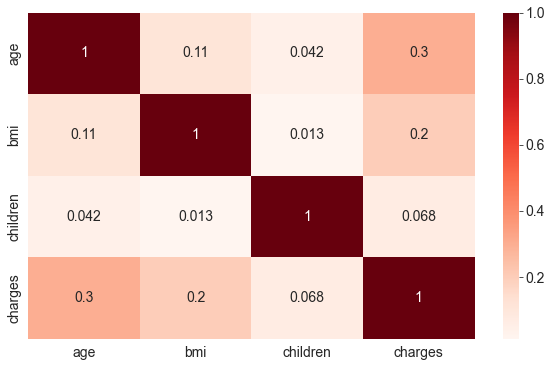

In [37]:
sns.heatmap(df.corr(),cmap = 'Reds',annot=True)


corelation can also be shown in scatter plots 
![title](xxx.png)



In [40]:

px.scatter(df,x='age',y='age')
#the straight slanting line shows the absolute correlation is 1, since the row & column are the same

# LINEAR REGRESSION USING SINGLE FEATURE 

The columns 'age' and 'smoker' has a correlation between the 'charges' column

In [41]:
# non-smoker dataframe

non_smoker_df = df[df.smoker=='no']

In [48]:

px.scatter(non_smoker_df,x = 'age', y = 'charges', title='Age Vs Charges (non - smokers)')

charges = w * age + b


w => weights
b => bias

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [53]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [54]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [67]:
inputs = df[['age']] # this should be a dataframe
target = df.charges

In [68]:
model.fit(inputs,target)

LinearRegression()

In [69]:
predictions = model.predict(inputs)

In [70]:
predictions

array([ 8062.61476073,  7804.89214207, 10382.11832874, ...,
        7804.89214207,  8578.05999807, 18886.96474474])

In [71]:
target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [75]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(inputs, target)

rmse = math.sqrt(mse)

print(rmse)

17930.598063336176
